In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import io
import os
import pathlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from scipy.stats import kstest, ranksums
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from bioinfokit.visuz import cluster

############################################
############### Parsing dati ###############

#Lettura dati da dataset
path = str(pathlib.Path().absolute())

df_real = pd.read_csv(path+'/synt_wl_low_pre.csv', index_col = 'id')
df_synt = pd.read_csv(path+'/synt_wl_low_post.csv', index_col = 'id')

print(df_real)

#df_real.describe()
df_real.values.std()

          PC1       PC2       PC3       PC4       PC5       PC6
id                                                             
8    3.842677 -0.094812  3.895122  1.011912 -0.114757  1.320620
12   7.858037  8.771275  9.060367  3.036811 -0.273418  0.786833
45   2.225987 -1.393447 -0.457763 -0.534012  0.144484 -0.254335
90   1.061289 -0.637732 -2.027771  2.310120 -3.168542  0.341437
97   1.340678  0.348752 -1.424372 -0.526598 -0.213823  0.260085
217 -0.935396  0.540011  1.095654 -0.245973  0.089047  2.214816
243 -2.114207 -0.840469  0.402115 -0.354523  0.136106  0.195338
278 -2.708065  2.372603 -1.329082  3.372981  2.489667  0.400539
280 -1.842393  4.758482 -1.533173 -1.165567  0.329982  0.596026


2.5040210754309364

# df_real distribution

In [5]:
stat, p_val = kstest(df_real.values.flatten(), cdf='norm')
N= df_real.values.flatten().size
p_rif = 0.05 #vogliamo il 95% di confidenza
#print(stat, ' ', p_val , ' ' , N)
if p_val<p_rif:
    print('La distribuzione non è normale')
else:
    print('La distribuzione è normale')

La distribuzione non è normale


In [32]:
for i in df_real.columns:
    stat, p_val = kstest(df_real[i], cdf='norm')

    if p_val<p_rif:
        print('La distribuzione di {} non è normale'.format(i))
    else:
        print('La distribuzione di {} è normale'.format(i))

La distribuzione di PC1 è normale
La distribuzione di PC2 è normale
La distribuzione di PC3 è normale
La distribuzione di PC4 è normale
La distribuzione di PC5 è normale
La distribuzione di PC6 non è normale


In [14]:
# import numpy as np 
# import pylab 
# import scipy.stats as stats

# for i in df_real.columns:
#     stats.probplot(df_real[i], dist="norm", plot=pylab)
#     pylab.show()

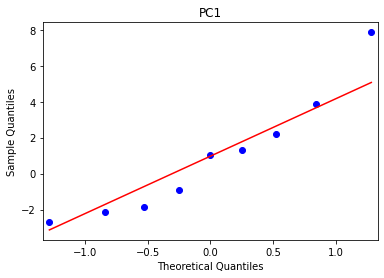

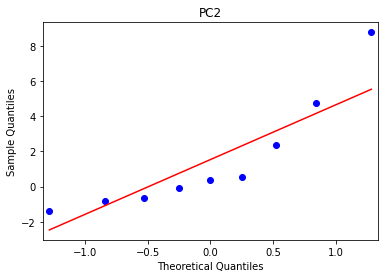

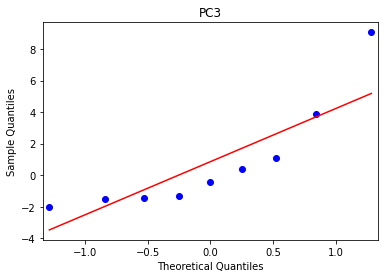

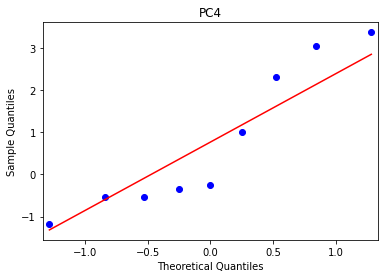

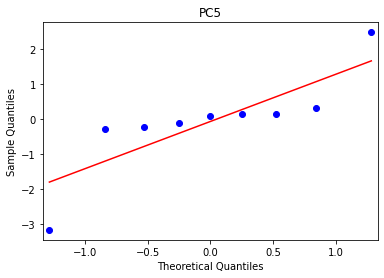

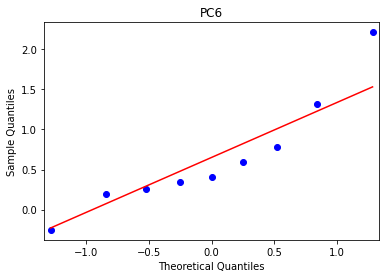

In [27]:
import statsmodels.api as sm

for i in df_real.columns:
    sm.qqplot(df_real[i], line='s')
    plt.title("{}".format(i))
    plt.show()

# df_synt distribution

In [28]:
stat, p_val = kstest(df_synt.values.flatten(), cdf='norm')
N= df_synt.values.flatten().size
#print(stat, ' ', p_val , ' ' , N)
#print(stat, ' ', p_val , ' ' , N)
if p_val<p_rif:
    print('La distribuzione non è normale')
else:
    print('La distribuzione è normale')

La distribuzione non è normale


In [31]:
for i in df_synt.columns:
    stat, p_val = kstest(df_synt[i], cdf='norm')

    if p_val<p_rif:
        print('La distribuzione di {} non è normale'.format(i))
    else:
        print('La distribuzione di {} è normale'.format(i))

La distribuzione di PC1 è normale
La distribuzione di PC2 è normale
La distribuzione di PC3 è normale
La distribuzione di PC4 è normale
La distribuzione di PC5 è normale
La distribuzione di PC6 è normale


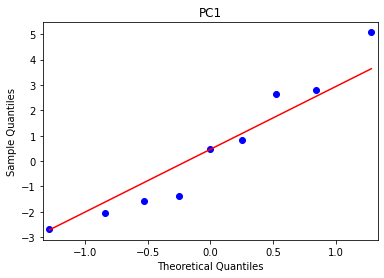

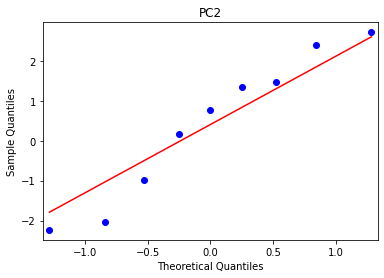

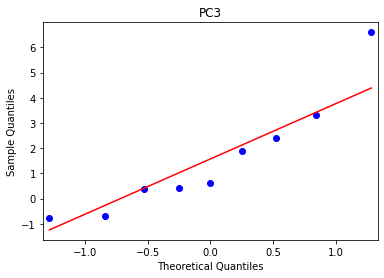

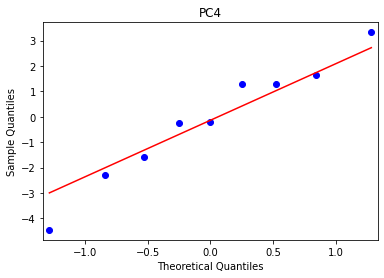

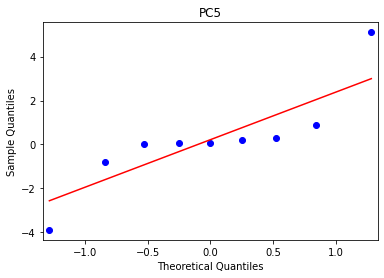

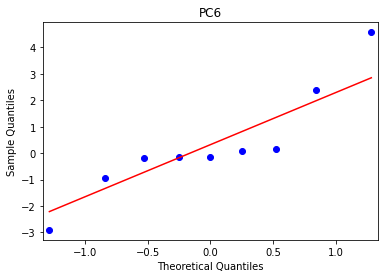

In [22]:
import statsmodels.api as sm

for i in df_synt.columns:
    sm.qqplot(df_synt[i], line='s')
    plt.title("{}".format(i))
    plt.show()

In [24]:
for col1,col2 in zip(df_real,df_synt):
    stat2, p_val2 = ranksums(df_real[col1].values, df_synt[col2].values)
    if p_val2<p_rif:
        print(f'Le colonne {col1} presentano differenze statistiche')
    else:
        print(f'Le colonne {col1} non presentano differenze statistiche')

Le colonne PC1 non presentano differenze statistiche
Le colonne PC2 non presentano differenze statistiche
Le colonne PC3 non presentano differenze statistiche
Le colonne PC4 non presentano differenze statistiche
Le colonne PC5 non presentano differenze statistiche
Le colonne PC6 non presentano differenze statistiche


### New Way

            W      pval  normal
PC1  0.914853  0.351333    True


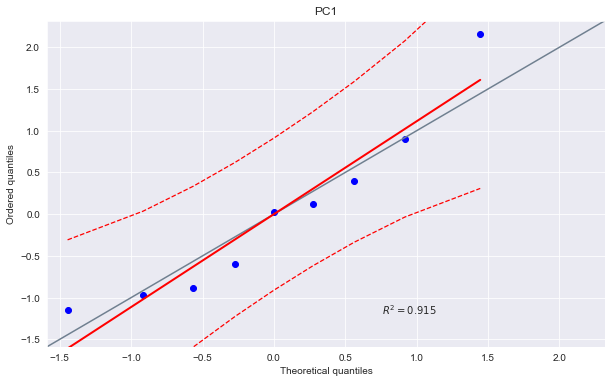

            W      pval  normal
PC2  0.817698  0.032454   False


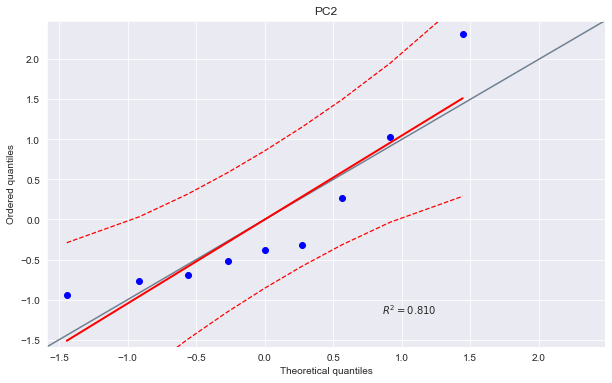

           W      pval  normal
PC3  0.78148  0.012526   False


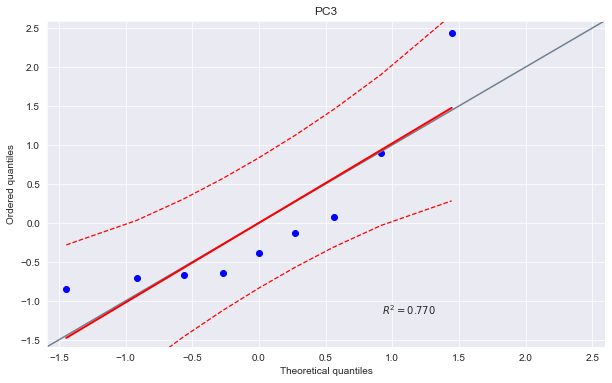

            W      pval  normal
PC4  0.860192  0.096347    True


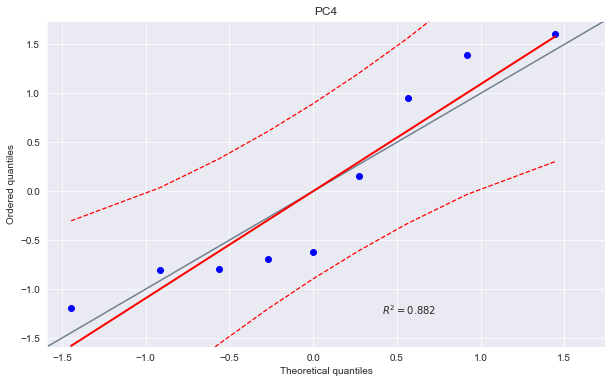

            W     pval  normal
PC5  0.795248  0.01802   False


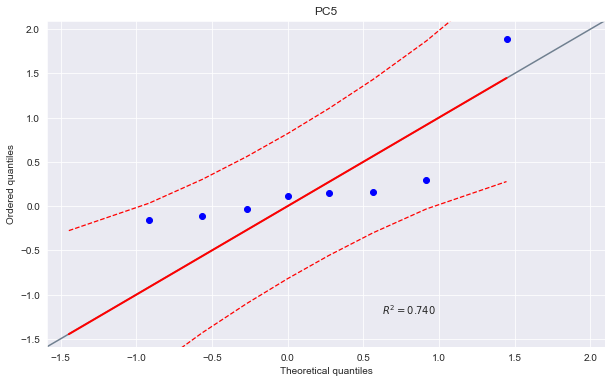

            W      pval  normal
PC6  0.891121  0.204885    True


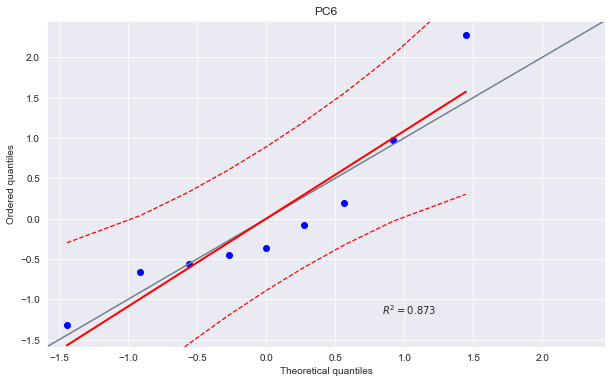

In [33]:
for i in df_real.columns:
    ax = pg.qqplot(df_real[i], dist='norm',confidence=.95, figsize=(10,6))
    boo = pg.normality((df_real[i]))
    print(boo)
    plt.title("{}".format(i))
    plt.show()

           W      pval  normal
PC1  0.93373  0.517648    True


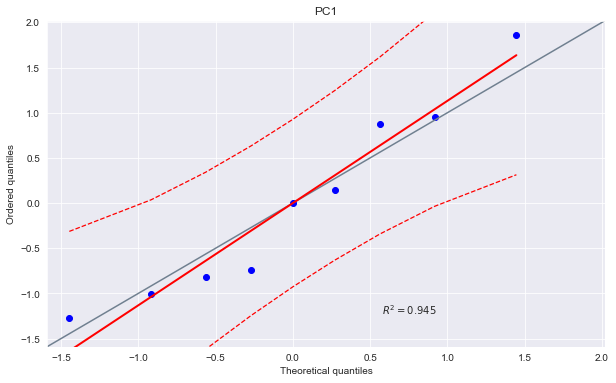

            W     pval  normal
PC2  0.928592  0.46806    True


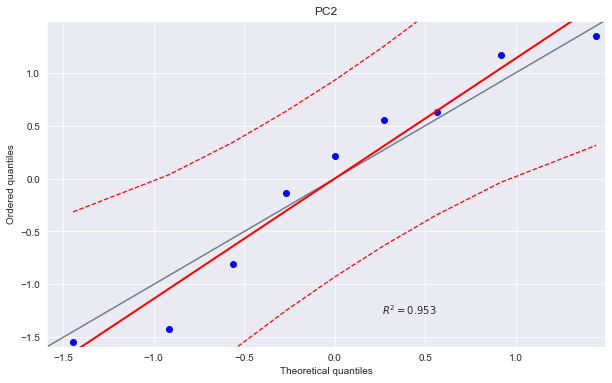

            W      pval  normal
PC3  0.880354  0.158372    True


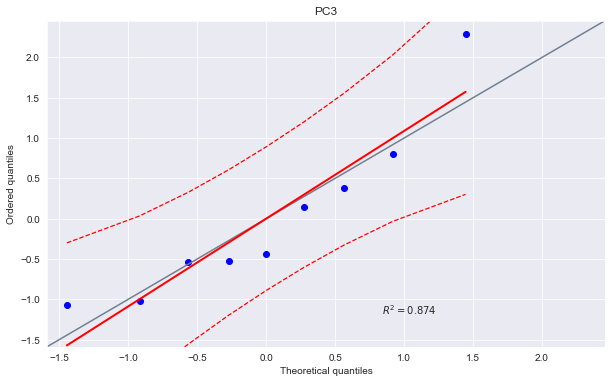

            W      pval  normal
PC4  0.968239  0.879261    True


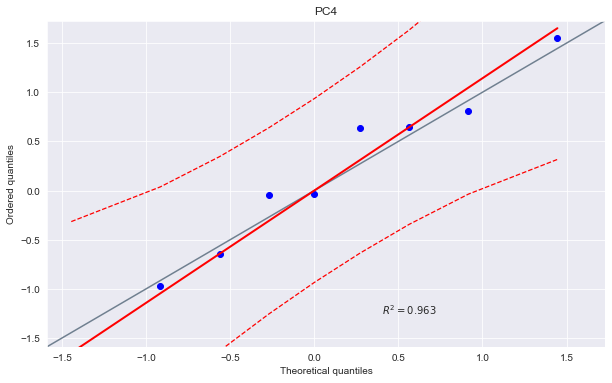

            W      pval  normal
PC5  0.823752  0.037986   False


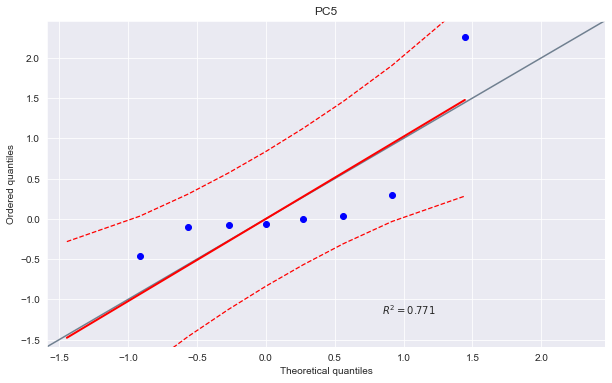

           W      pval  normal
PC6  0.88347  0.170739    True


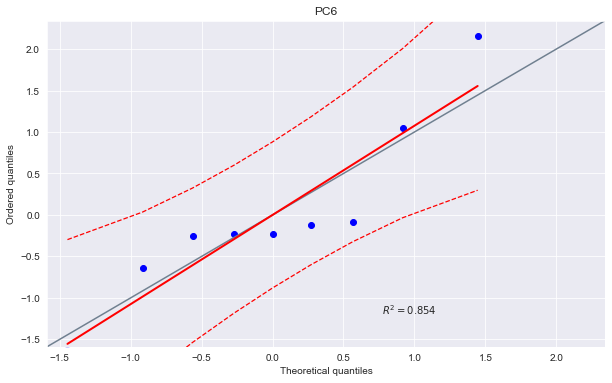

In [34]:
for i in df_synt.columns:
    ax = pg.qqplot(df_synt[i], dist='norm',confidence=.95, figsize=(10,6))
    boo = pg.normality((df_synt[i]))
    print(boo)
    plt.title("{}".format(i))
    plt.show()

In [35]:
for col1,col2 in zip(df_real,df_synt):
    ret = pg.wilcoxon(df_real[col1].values, df_synt[col2].values)
    print(ret)
#     if ret['p-val']<0.05:
#         print(f'Le colonne {col1} presentano differenze statistiche')
#     else:
#         print(f'Le colonne {col1} non presentano differenze statistiche')

          W-val       tail     p-val       RBC      CLES
Wilcoxon   11.0  two-sided  0.203125  0.511111  0.518519
          W-val       tail     p-val       RBC     CLES
Wilcoxon   13.0  two-sided  0.300781  0.422222  0.54321
          W-val       tail     p-val  RBC      CLES
Wilcoxon   18.0  two-sided  0.652344 -0.2  0.333333
          W-val       tail     p-val  RBC      CLES
Wilcoxon   18.0  two-sided  0.652344  0.2  0.555556
          W-val       tail     p-val       RBC     CLES
Wilcoxon   20.0  two-sided  0.820312  0.111111  0.45679
          W-val       tail     p-val       RBC      CLES
Wilcoxon   17.0  two-sided  0.570312  0.244444  0.716049
